# Bibliotecas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Dados

In [2]:
df = pd.read_csv('monitoramento_tempo.csv')

In [3]:
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


Converter a coluna 'data' para datetime

In [5]:
df['data'] = pd.to_datetime(df['data'])

# Plots dos dados

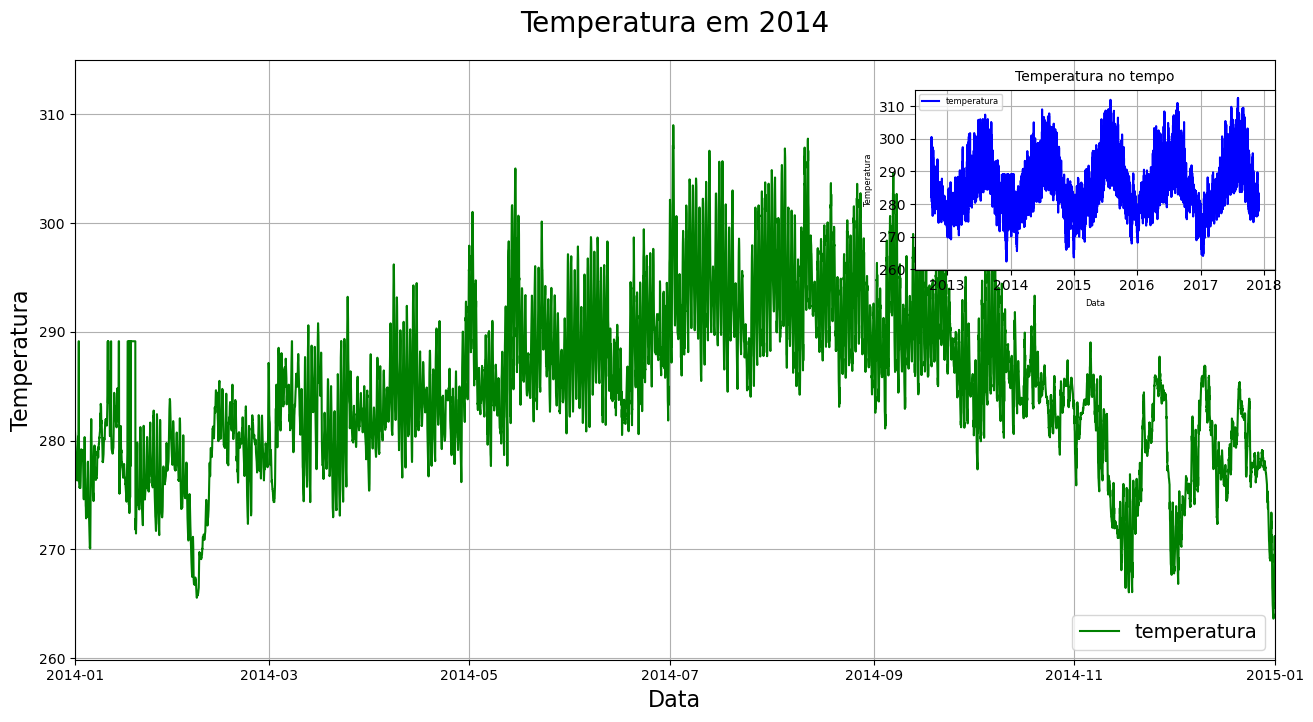

In [24]:
fig = plt.figure(figsize=(12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])
eixo.plot(df['data'], df['temperatura'], color = 'g')

eixo.set_xlim(datetime(2014,1,1), datetime(2015,1,1))
eixo.set_title('Temperatura em 2014', fontsize = 20, pad = 20)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Data', fontsize = 16)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 14)
eixo.grid(True)

eixo2.plot(df['data'], df['temperatura'], color = 'b')
eixo2.set_title('Temperatura no tempo', fontsize = 10)
eixo2.set_ylabel('Temperatura', fontsize = 6)
eixo2.set_xlabel('Data', fontsize = 6)
eixo2.legend(['temperatura'], loc = 'best', fontsize = 6)
eixo2.grid(True)

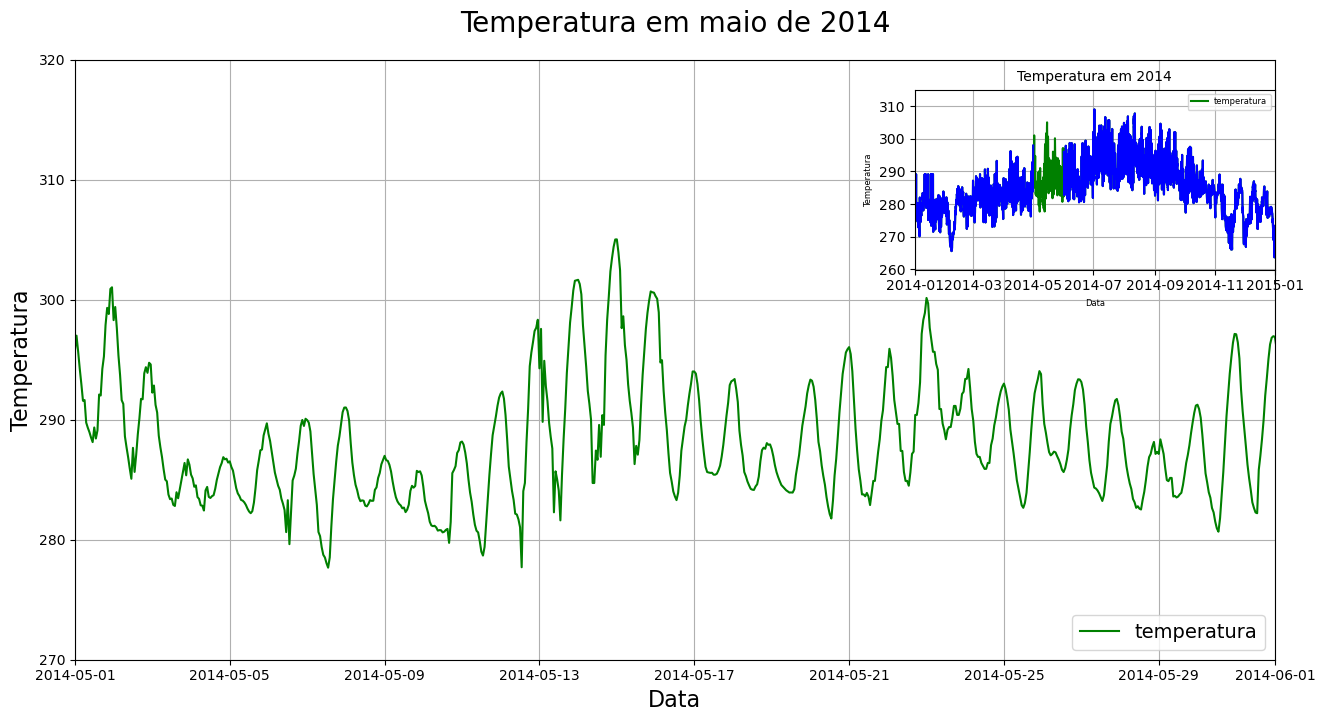

In [26]:
fig = plt.figure(figsize=(12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])
eixo.plot(df['data'], df['temperatura'], color = 'g')

eixo.set_xlim(datetime(2014,5,1), datetime(2014,6,1))
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em maio de 2014', fontsize = 20, pad = 20)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Data', fontsize = 16)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 14)
eixo.grid(True)

azul_esquerda = df['data'] < datetime(2014, 5, 1)
azul_direita = df['data'] > datetime(2014, 6, 1)

eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')
eixo2.set_xlim(datetime(2014,1,1), datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize = 10)
eixo2.set_ylabel('Temperatura', fontsize = 6)
eixo2.set_xlabel('Data', fontsize = 6)
eixo2.legend(['temperatura'], loc = 'best', fontsize = 6)
eixo2.grid(True)

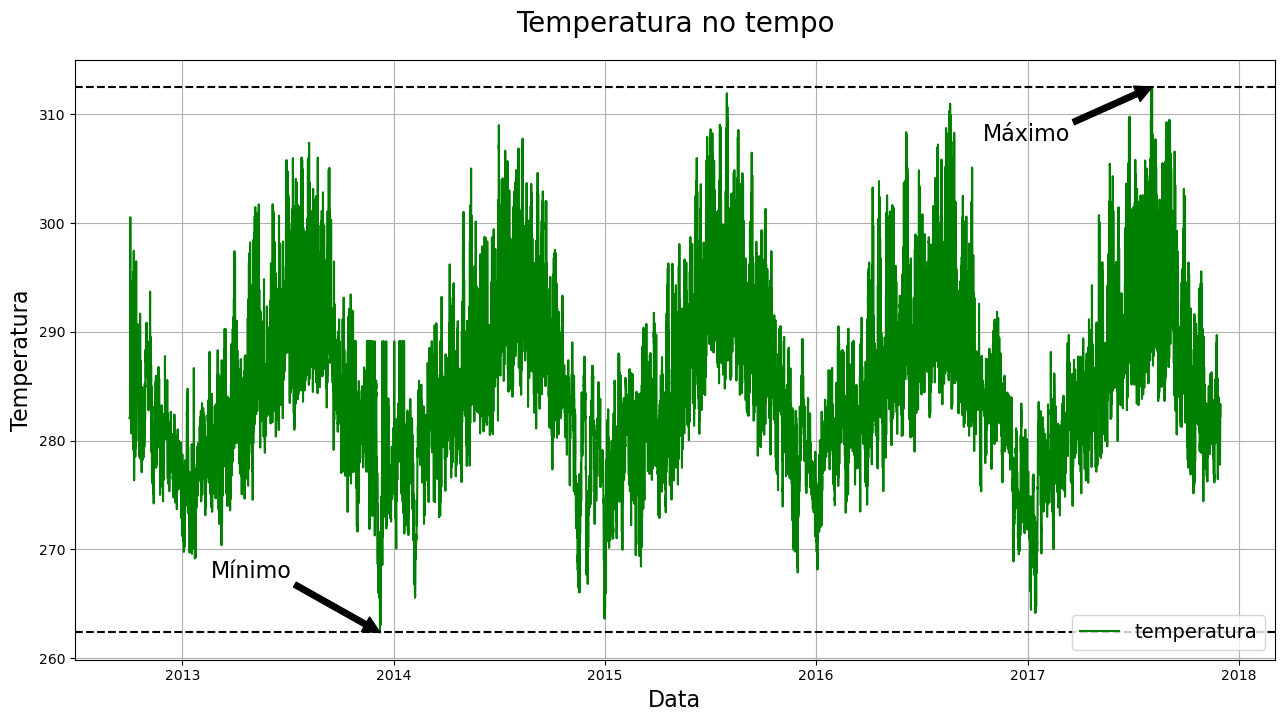

In [32]:
fig = plt.figure(figsize=(12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df['data'], df['temperatura'], color = 'g')

eixo.set_title('Temperatura no tempo', fontsize = 20, pad = 20)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Data', fontsize = 16)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 14)
eixo.grid(True)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate('Máximo', xy=(x1,y1), fontsize=16, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmin() - 7000]
y2 = min(df['temperatura']) + 5

eixo.annotate('Mínimo', xy=(x1,y1), fontsize=16, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')

In [33]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(1, 0, 'Segunda'),
 Text(2, 0, 'Terça'),
 Text(3, 0, 'Quarta'),
 Text(4, 0, 'Quinta'),
 Text(5, 0, 'Sexta'),
 Text(6, 0, 'Sábado')]

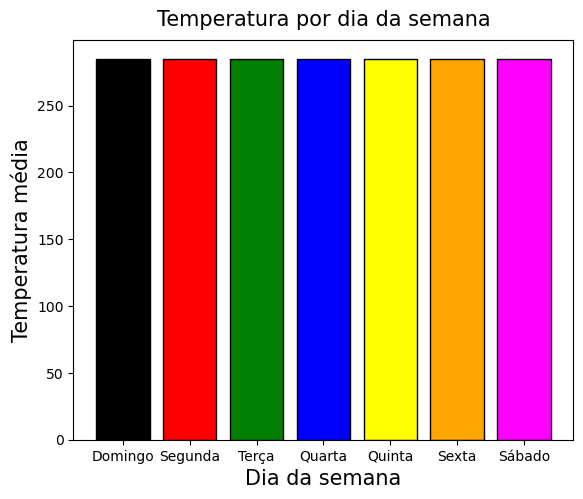

In [35]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_por_dia_da_semana))
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

eixo.bar(indice, temperatura_por_dia_da_semana, color = cores, edgecolor = 'black')
eixo.set_title('Temperatura por dia da semana', fontsize = 15, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 15)
eixo.set_ylabel('Temperatura média', fontsize = 15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

Text(0.5, 1.0, 'Temperatura por dia da semana')

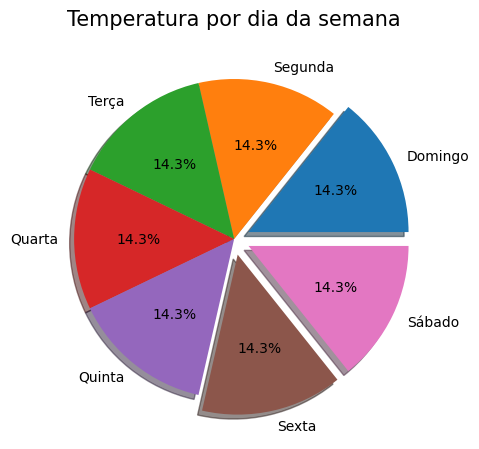

In [36]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.1,0,0,0,0,0.1,0.1]

eixo.pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index,
         autopct='%.1f%%', explode=explodir, shadow=True)
eixo.set_title('Temperatura por dia da semana', size=15, pad=10)